# Out-of-Distribution Detection

In [1]:
import os
import sys
import torch

current_dir = os.getcwd()
openood_dir = os.path.abspath(os.path.join(current_dir, '../OpenOOD/')) 

if openood_dir not in sys.path:
    sys.path.append(openood_dir)

from openood.networks import ResNet18_32x32
from openood.evaluation_api import Evaluator, datasets

In [2]:
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")

In [3]:
# net = ResNet18_32x32(num_classes=100) # num_class=100 (CIFAR-100)
# net.load_state_dict(
#     torch.load('cifar100_resnet18_32x32_base_e100_lr0.1_default/s0/best.ckpt', 
#                map_location=device)
# )
# net.to(device)
# net.eval()

net = ResNet18_32x32(num_classes=10) # num_class=100 (CIFAR-100)
net.load_state_dict(
    torch.load('cifar10_resnet18_32x32_base_e100_lr0.1_default/s0/best.ckpt', 
               map_location=device)
)
net.to(device)
net.eval()

ResNet18_32x32(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1,

In [4]:
# from torchsummary import summary
# summary(net, (3, 32, 32))

In [5]:
# from torchviz import make_dot

# # Define the model

# # Create a dummy input tensor
# x = torch.randn(1, 3, 32, 32)

# # Forward pass through the model
# y = net(x)

# # Visualize the model computation graph
# graph = make_dot(y, params=dict(net.named_parameters()))
# graph.render("resnet18_32x32", format="png")


In [8]:
postprocessor_name = "react" # msp, mls, temp_scaling, ebo, odin, react

In [ ]:

evaluator = Evaluator(
    net,
    id_name='cifar10',                     # the target ID dataset
    data_root='./data',                    # change if necessary
    config_root=None,                      # see notes above
    preprocessor=None,                     # default preprocessing for the target ID dataset
    postprocessor_name=postprocessor_name, # the postprocessor to use
    postprocessor=None,                    # if you want to use your own postprocessor
    batch_size=128,                        # for certain methods the results can be slightly affected by batch size
    shuffle=False,
    num_workers=4
    )                         # could use more num_workers outside colab

In [ ]:
metrics = evaluator.eval_ood(fsood=False)

In [ ]:
# print('Components within evaluator.metrics:\t', evaluator.metrics.keys())
# print('Components within evaluator.scores:\t', evaluator.scores.keys())
# print('')
# print('The predicted ID class of the first 10 samples of CIFAR-10:\t', evaluator.scores['ood']['near']['cifar10'][0][:10])
# print('The OOD score of the first 10 samples of CIFAR-10:\t', evaluator.scores['ood']['near']['cifar10'][1][:10])
# print('')
# print('The predicted ID class of the first 10 samples of TinyImageNet:\t', evaluator.scores['ood']['near']['tin'][0][:10])
# print('The OOD score of the first 10 samples of TinyImageNet:\t', evaluator.scores['ood']['near']['tin'][1][:10])

print('Components within evaluator.metrics:\t', evaluator.metrics.keys())
print('Components within evaluator.scores:\t', evaluator.scores.keys())
print('')
print('The predicted ID class of the first 10 samples of CIFAR-100:\t', evaluator.scores['ood']['near']['cifar100'][0][:10])
print('The OOD score of the first 10 samples of CIFAR-100:\t', evaluator.scores['ood']['near']['cifar100'][1][:10])
print('')
print('The predicted ID class of the first 10 samples of TinyImageNet:\t', evaluator.scores['ood']['near']['tin'][0][:10])
print('The OOD score of the first 10 samples of TinyImageNet:\t', evaluator.scores['ood']['near']['tin'][1][:10])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import matplotlib.patches as patches
from PIL import Image


# Extract data
id_gt = evaluator.scores['id']['test'][0]
id_conf = evaluator.scores['id']['test'][1]
id_pred = evaluator.scores['id']['test'][2]
id_file_paths = evaluator.scores['id']['test'][3]

# Number of images to display
num_images_to_display = 100

classes_cifar100 = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup",
    "dinosaur", "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house",
    "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man",
    "maple_tree", "motorcycle", "mountain", "mouse", "mushroom", "oak_tree", "orange", "orchid",
    "otter", "palm_tree", "pear", "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine",
    "possum", "rabbit", "raccoon", "ray", "road", "rocket", "rose", "sea", "seal", "shark", "shrew",
    "skunk", "skyscraper", "snail", "snake", "spider", "squirrel", "streetcar", "sunflower",
    "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor", "train", "trout",
    "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

# Select 20 random indices
random_indices = np.random.choice(len(id_gt), num_images_to_display, replace=False)

# Create a figure and axis for plotting
fig, axes = plt.subplots(10, 10, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Display the randomly selected images in a grid
for i, idx in enumerate(random_indices):
    row = i // 10
    col = i % 10
    

    image_path = id_file_paths[idx]
    # img = mpimg.imread(image_path)
    img = Image.open(image_path)
    ground_truth = classes_cifar100[id_gt[idx]]
    predicted_label = classes_cifar100[id_pred[idx]]
    score = id_conf[idx]

    axes[row, col].imshow(img)
    axes[row, col].set_title(f"Ground Truth: {ground_truth}\nPredicted: {predicted_label}\nScore: {score:.4f}")
    axes[row, col].axis('off')

    if ground_truth != predicted_label:
        rect = patches.Rectangle((0, 0), img.size[0], img.size[1], linewidth=3, edgecolor='red', facecolor='none')
        axes[row, col].add_patch(rect)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

cm = confusion_matrix(id_gt, id_pred)
matrix_df = pd.DataFrame(cm)

plt.figure(figsize=[20, 20])
sns.set(font_scale=0.5)
sns.heatmap(matrix_df, annot=True, fmt="g", cmap="Blues")#set axis titles
plt.title('Confusion Matrix', fontsize=12)
plt.xlabel("Predicted label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

plt.show()

In [ ]:
# Extract data
ood_gt_cifar10 = evaluator.scores['ood']['near']['cifar10'][0]
ood_conf_cifar10 = evaluator.scores['ood']['near']['cifar10'][1]
ood_pred_cifar10 = evaluator.scores['ood']['near']['cifar10'][2]
ood_file_paths_cifar10 = evaluator.scores['ood']['near']['cifar10'][3]

classes_cifar10 = ['automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
is_id_map = {0: "id", -1: "ood"}

# Create a figure and axis for plotting
fig, axes = plt.subplots(10, 10, figsize=(15, 12))

# Display the randomly selected images in a grid
for i, idx in enumerate(random_indices):
    row = i // 10
    col = i % 10

    image_path = ood_file_paths_cifar10[idx]
    # img = mpimg.imread(image_path)
    img = Image.open(image_path)
    # Extract class name from the file path
    class_name = image_path.split('/')[-2]  # Adjust the split as per your file path structure
    
    # Ground truth label (converted to string)
    ground_truth = class_name
    predicted_label = classes_cifar100[id_pred[idx]]
    score = ood_conf_cifar10[idx]
    is_ood = True if score > 0.5 else False

    axes[row, col].imshow(img)
    axes[row, col].set_title(f"Ground Truth: {ground_truth}\nPredicted: {predicted_label}\nOOD score: {score:.4f}\nis_OOD: {is_ood}")
    axes[row, col].axis('off')

    if is_ood:
        rect = patches.Rectangle((0, 0), img.size[0], img.size[1], linewidth=3, edgecolor='red', facecolor='none')
        axes[row, col].add_patch(rect)

plt.tight_layout()
plt.show()


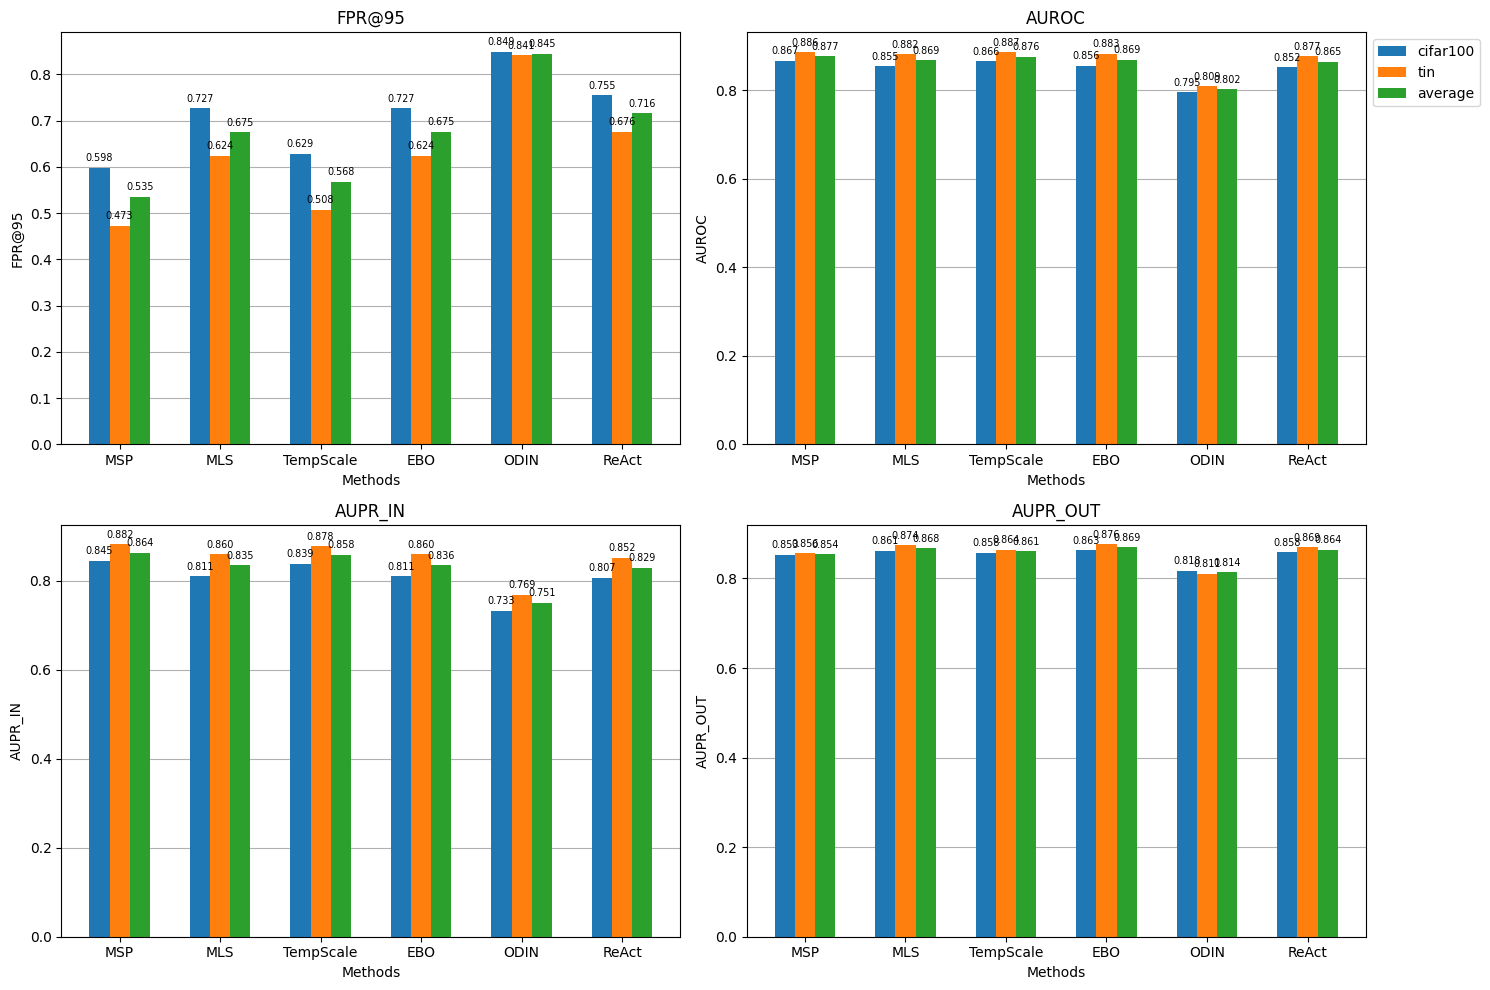

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the chart
methods = ['MSP', 'MLS', 'TempScale', 'EBO', 'ODIN', 'ReAct']
datasets = ['cifar100', 'tin', 'average']
metrics = ['FPR@95', 'AUROC', 'AUPR_IN', 'AUPR_OUT']
data = {
    'MSP': [ [0.5982, 0.8673, 0.8454, 0.8528], [0.4727, 0.8864, 0.8822, 0.8558], [0.5354, 0.8768, 0.8638, 0.8543] ],
    'MLS': [ [0.7266, 0.8549, 0.8108, 0.8614], [0.624, 0.8822, 0.8597, 0.8741], [0.6753, 0.8686, 0.8352, 0.8677] ],
    'TempScale': [ [0.6289, 0.8661, 0.8386, 0.8579], [0.5079, 0.8869, 0.8781, 0.8636], [0.5684, 0.8765, 0.8584, 0.8607] ],
    'EBO': [ [0.7269, 0.8555, 0.811, 0.8626], [0.624, 0.8831, 0.8601, 0.8762], [0.6754, 0.8693, 0.8355, 0.8694] ],
    'ODIN': [ [0.8487, 0.7955, 0.7332, 0.8175], [0.8412, 0.8095, 0.769, 0.811], [0.8449, 0.8025, 0.7511, 0.8142] ],
    'ReAct': [ [0.7551, 0.8524, 0.8067, 0.8583], [0.6763, 0.877, 0.8516, 0.8693], [0.7157, 0.8647, 0.8291, 0.8638] ]
}

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    bar_width = 0.2
    index = np.arange(len(methods))
    
    for i, dataset in enumerate(datasets):
        values = [data[method][i][idx] for method in methods]
        ax.bar(index + i * bar_width, values, bar_width, label=dataset, zorder=2)
    # Adding labels on each bar
        for j, value in enumerate(values):
            ax.text(index[j] + i * bar_width, value + 0.01, f'{value:.3f}', ha='center', va='bottom', fontsize='x-small')
    ax.set_xlabel('Methods')
    ax.set_ylabel(metric)
    ax.set_title(metric)
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(methods)
    if idx == 1:
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    
    ax.grid(axis='y', zorder=1)

plt.tight_layout()
plt.show()


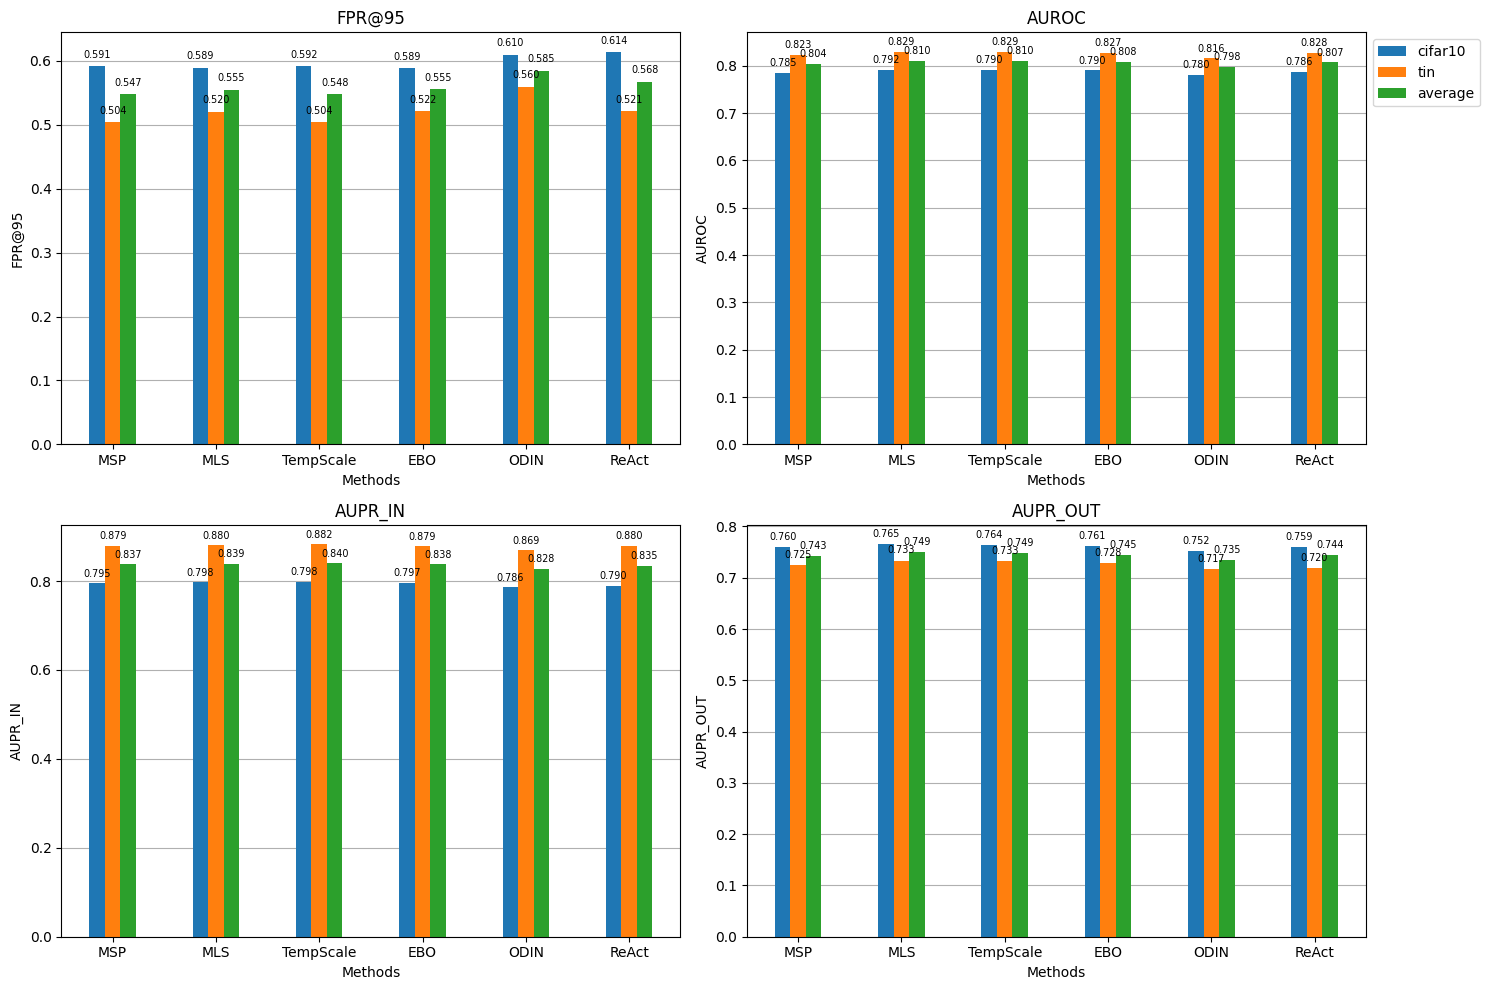

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the chart
methods = ['MSP', 'MLS', 'TempScale', 'EBO', 'ODIN', 'ReAct']
datasets = ['cifar10', 'tin', 'average']
metrics = ['FPR@95', 'AUROC', 'AUPR_IN', 'AUPR_OUT']

# Define the data (based on the provided table)
data = {
    ('MSP', 'cifar10'): [0.5912, 0.7854, 0.795, 0.7597],
    ('MSP', 'tin'): [0.5038, 0.823, 0.8793, 0.7254],
    ('MSP', 'average'): [0.5475, 0.8042, 0.8372, 0.7426],
    ('MLS', 'cifar10'): [0.5893, 0.792, 0.7976, 0.7652],
    ('MLS', 'tin'): [0.5202, 0.8288, 0.8799, 0.7334],
    ('MLS', 'average'): [0.5548, 0.8104, 0.8388, 0.7493],
    ('TempScale', 'cifar10'): [0.5917, 0.7905, 0.7981, 0.7645],
    ('TempScale', 'tin'): [0.504, 0.8291, 0.8825, 0.7329],
    ('TempScale', 'average'): [0.5478, 0.8098, 0.8403, 0.7487],
    ('EBO', 'cifar10'): [0.5888, 0.7901, 0.7966, 0.7614],
    ('EBO', 'tin'): [0.5216, 0.8266, 0.8788, 0.7284],
    ('EBO', 'average'): [0.5552, 0.8083, 0.8377, 0.7449],
    ('ODIN', 'cifar10'): [0.6098, 0.7803, 0.7865, 0.7517],
    ('ODIN', 'tin'): [0.5597, 0.8157, 0.8687, 0.7174],
    ('ODIN', 'average'): [0.5847, 0.798, 0.8276, 0.7346],
    ('ReAct', 'cifar10'): [0.6139, 0.7864, 0.7898, 0.7594],
    ('ReAct', 'tin'): [0.5213, 0.8277, 0.8796, 0.7195],
    ('ReAct', 'average'): [0.5676, 0.807, 0.8347, 0.7444],
}

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    bar_width = 0.15
    index = np.arange(len(methods))

    for i, dataset in enumerate(datasets):
        values = [data[(method, dataset)][idx] for method in methods]
        ax.bar(index + i * bar_width, values, bar_width, label=dataset, zorder=2)
        # Adding labels on each bar
        for j, value in enumerate(values):
            ax.text(index[j] + i * bar_width, value + 0.01, f'{value:.3f}', ha='center', va='bottom', fontsize='x-small')
    ax.set_xlabel('Methods')
    ax.set_ylabel(metric)
    ax.set_title(metric)
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(methods)

    # Add legend outside the plot area
    if idx == 1:
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    ax.grid(axis='y', zorder=1)
plt.tight_layout()
plt.show()